In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [262]:
df_2048 = pd.read_csv('efs-scalability-2048.csv')
df_2048_2 = pd.read_csv('efs-scalability-2048-2.csv')
df_512 = pd.read_csv('efs-scalability-512.csv')
df_512_2 = pd.read_csv('efs-scalability-512-2.csv')

In [263]:
df

,second_type/S,disk_read_bandwidth/N,disk_read_latency/N,third_type/S,fs/S,bs/S,test/S,type/S,id/N,count/S,latency/N,result/S
0,sequence,1.018620,196.344131,read,200MB,1024KB,efs_strong100,efs,1.596427e+09,NaN,NaN,NaN
1,dd,NaN,NaN,NaN,NaN,1024KB,efs_strong200,efs,1.596429e+09,200.0,405.402032,"209715200 bytes (210 MB) copied, 405.34 s, 517..."
2,random,0.502864,397.721871,read,200MB,1024KB,efs_strong200,efs,1.596426e+09,NaN,NaN,NaN
3,random,0.505213,395.872552,read,200MB,1024KB,efs_strong200,efs,1.596426e+09,NaN,NaN,NaN
4,sequence,0.488547,409.377037,read,200MB,1024KB,efs_strong200,efs,1.596428e+09,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,sequence,2.473497,80.857169,read,200MB,1024KB,efs_strong50,efs,1.596427e+09,NaN,NaN,NaN
1139,random,0.504747,396.238407,read,200MB,1024KB,efs_strong200,efs,1.596426e+09,NaN,NaN,NaN
1140,sequence,0.502665,397.879012,read,200MB,1024KB,efs_strong200,efs,1.596428e+09,NaN,NaN,NaN
1141,random,0.512190,390.480364,read,200MB,1024KB,efs_strong200,efs,1.596426e+09,NaN,NaN,NaN


In [264]:
df_ran = df.copy()
df_seq = df.copy()
df_dd = df.copy()

df_ran = df_ran[df_ran['second_type/S'].isin(['random'])]
df_seq = df_seq[df_seq['second_type/S'].isin(['sequence'])]
df_dd = df_dd[df_dd['second_type/S'].isin(['dd'])]

concurrency = ['efs_strong1',
             'efs_strong10',
             'efs_strong20',
             'efs_strong50',
             'efs_strong100',
             'efs_strong200']

In [274]:
df_ran = df_512_2.copy()
df_seq = df_512_2.copy()
df_dd = df_512_2.copy()

file_size = 200
df_ran = df_ran[df_ran['second_type/S'].isin(['random'])]
df_seq = df_seq[df_seq['second_type/S'].isin(['sequence'])]
df_dd = df_dd[df_dd['second_type/S'].isin(['dd'])]

concurrency = ['efs_strong1',
             'efs_strong10',
             'efs_strong20',
             'efs_strong50',
             'efs_strong100',
             'efs_strong200']

ran_latency = []
ran_bw = []
ran_err = []
for ran in concurrency:
    df_col = df_ran[df_ran['test/S'].isin([ran])]
    avg_latency = df_col['disk_read_latency/N'].mean()
    avg_bandwidth = df_col['disk_read_bandwidth/N'].mean()
    ran_latency.append(avg_latency)
    ran_bw.append(avg_bandwidth)
    ran_err.append((avg_latency - df_col['disk_read_latency/N'].min(),df_col['disk_read_latency/N'].max() - avg_latency)) 
    
error_ran = np.array(ran_err)
print(error_ran)

seq_latency = []
seq_bw = []
seq_err = []
for seq in concurrency:
    df_col = df_seq[df_seq['test/S'].isin([seq])]
    avg_latency = df_col['disk_read_latency/N'].mean()
    avg_bandwidth = df_col['disk_read_bandwidth/N'].mean()
    seq_latency.append(avg_latency)
    seq_bw.append(avg_bandwidth)
    seq_err.append((avg_latency - df_col['disk_read_latency/N'].min(),df_col['disk_read_latency/N'].max() - avg_latency)) 
print(seq_latency)
error_seq = np.array(seq_err)
print(error_seq)

dd_latency = []
dd_bw = []
dd_err = []
for d in concurrency:
    df_col = df_dd[df_dd['test/S'].isin([d])]
    avg_latency = df_col['latency/N'].mean()
    avg_bandwidth = df_col['disk_read_bandwidth/N'].mean()
    dd_latency.append(avg_latency)
    dd_bw.append(file_size/avg_latency)
    dd_err.append((avg_latency - df_col['latency/N'].min(),df_col['latency/N'].max() - avg_latency)) 
    
error_dd = np.array(dd_err)
print(error_dd)


[[ 0.          0.        ]
 [ 0.20382953  0.19883633]
 [ 1.50023932  1.19671493]
 [ 2.25999885  2.42270584]
 [28.56542082 21.57593421]
 [ 7.45233068  2.50771013]]
[3.423007249832153, 2.8418091643940318, 34.676311540603635, 87.5743313954801, 181.19112777218376, 400.0398079800606]
[[ 0.          0.        ]
 [ 2.70844902  1.98020731]
 [ 3.67174296  1.58960481]
 [13.68731653  3.60014666]
 [51.441895   25.66129327]
 [10.62343067  4.76121932]]
[[ 0.          0.        ]
 [ 0.45193116  0.80772599]
 [ 2.16799551  0.78074449]
 [ 4.93565688  1.54746047]
 [25.93065483 27.2478916 ]
 [33.82191953 11.39363137]]


In [272]:
df_ran = df_2048_2.copy()
df_seq = df_2048_2.copy()
df_dd = df_2048_2.copy()

df_ran = df_ran[df_ran['second_type/S'].isin(['random'])]
df_seq = df_seq[df_seq['second_type/S'].isin(['sequence'])]
df_dd = df_dd[df_dd['second_type/S'].isin(['dd'])]

concurrency = ['efs_strong1',
             'efs_strong10',
             'efs_strong20',
             'efs_strong50',
             'efs_strong100',
             'efs_strong200']
concurrency_num = ['1','10','20','50','100','200']
ran_latency = []
ran_err = []
for ran in concurrency:
    df_col = df_ran[df_ran['test/S'].isin([ran])]
    avg_latency = df_col['disk_read_latency/N'].mean()
    avg_bandwidth = df_col['disk_read_bandwidth/N'].mean()
    ran_latency.append(avg_latency)
    ran_err.append((avg_latency - df_col['disk_read_latency/N'].min(),df_col['disk_read_latency/N'].max() - avg_latency)) 
    
error_ran = np.array(ran_err)
print(error_ran)

seq_latency = []
seq_err = []
for seq in concurrency:
    df_col = df_seq[df_seq['test/S'].isin([seq])]
    avg_latency = df_col['disk_read_latency/N'].mean()
    avg_bandwidth = df_col['disk_read_bandwidth/N'].mean()
    seq_latency.append(avg_latency)
    seq_err.append((avg_latency - df_col['disk_read_latency/N'].min(),df_col['disk_read_latency/N'].max() - avg_latency)) 
print(seq_latency)
error_seq = np.array(seq_err)
print(error_seq)

dd_latency = []
dd_err = []
for d in concurrency:
    df_col = df_dd[df_dd['test/S'].isin([d])]
    avg_latency = df_col['latency/N'].mean()
    dd_latency.append(avg_latency)
    dd_err.append((avg_latency - df_col['latency/N'].min(),df_col['latency/N'].max() - avg_latency)) 
    
error_dd = np.array(dd_err)
print(error_dd)


[[ 0.          0.        ]
 [13.0884398   3.43475499]
 [ 0.82432446  1.03548136]
 [ 1.72285857  1.38407168]
 [23.81506001 27.90635026]
 [ 5.37128033  2.30118929]]
[3.266650676727296, 2.8843382000923157, 34.797430872917175, 85.60457009792327, 198.12374337995894, 402.59887076616286]
[[  0.           0.        ]
 [  0.43072826   0.5408079 ]
 [  3.50161135   2.31662285]
 [ 14.50867767   4.44088822]
 [ 66.37769255  28.50361267]
 [402.45436932   6.93393325]]
[[ 0.          0.        ]
 [ 2.26248202  0.82557073]
 [ 1.30208389  1.15441164]
 [ 3.20209714  1.76965765]
 [25.64969621 25.04342236]
 [10.99026918  6.51249076]]


In [275]:
print(ran_bw)
print(seq_bw)
print(dd_bw)

fig, axes = plt.subplots(1,3,figsize=(10,7))

axes[0] = plt.subplot(1,3,1)
axes[1] = plt.subplot(1,3,2)
axes[2] = plt.subplot(1,3,3)
axes[0].bar(concurrency_num,ran_bw)
axes[0].set_xlabel('random read',fontsize=15)
axes[1].bar(concurrency_num,seq_latency,yerr=error_seq.T)
axes[1].set_xlabel('sequence read',fontsize=15)
print(error_seq)
axes[2].bar(concurrency_num,dd_latency,yerr=error_dd.T)
axes[2].set_xlabel('dd',fontsize=15)
axes[0].set_ylabel('Latency',fontsize=30)
fig.suptitle('Lambda:512MB',fontsize=30)

[52.01146004460211, 10.860569223043685, 5.64186814882023, 2.257987031070644, 1.02490326361768, 0.49180675171685295]
[58.428155537738625, 197.36146600386456, 5.776106222664471, 2.2893115928175884, 1.111644093684757, 0.4999912873264299]
[72.51407473283768, 17.86903297507918, 5.5571729586569525, 2.225014485628602, 1.0559428216706046, 0.4503322889500294]


[[ 0.          0.        ]
 [ 2.70844902  1.98020731]
 [ 3.67174296  1.58960481]
 [13.68731653  3.60014666]
 [51.441895   25.66129327]
 [10.62343067  4.76121932]]


Text(0.5, 0.98, 'Lambda:512MB')

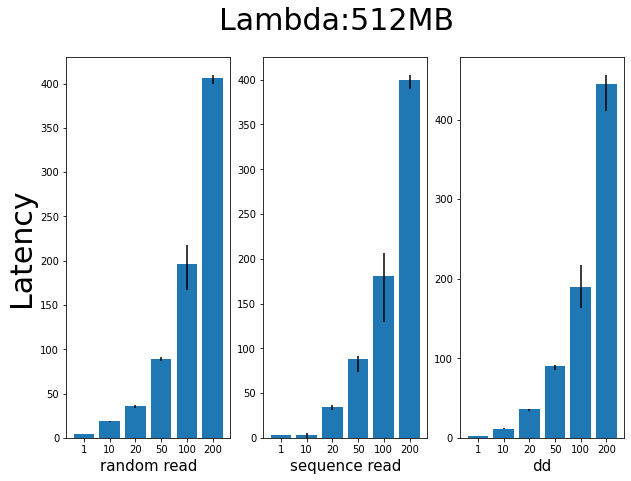

In [269]:
fig, axes = plt.subplots(1,3,figsize=(10,7))

axes[0] = plt.subplot(1,3,1)
axes[1] = plt.subplot(1,3,2)
axes[2] = plt.subplot(1,3,3)
axes[0].bar(concurrency_num,ran_bw)
axes[0].set_xlabel('random read',fontsize=15)
axes[1].bar(concurrency_num,seq_latency,yerr=error_seq.T)
axes[1].set_xlabel('sequence read',fontsize=15)
print(error_seq)
axes[2].bar(concurrency_num,dd_latency,yerr=error_dd.T)
axes[2].set_xlabel('dd',fontsize=15)
axes[0].set_ylabel('Latency',fontsize=30)
fig.suptitle('Lambda:512MB',fontsize=30)

Text(0.5, 0.98, 'Lambda:2048MB')

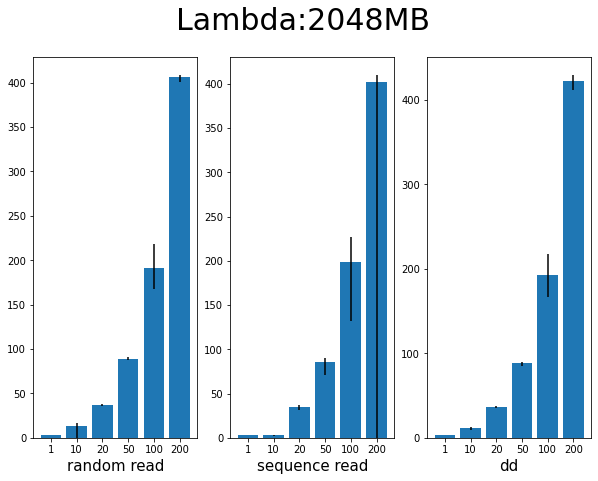

In [273]:
fig, axes = plt.subplots(1,3,figsize=(10,7))

axes[0] = plt.subplot(1,3,1)
axes[1] = plt.subplot(1,3,2)
axes[2] = plt.subplot(1,3,3)
axes[0].bar(concurrency_num,ran_bw)
axes[0].set_xlabel('random read',fontsize=15)
axes[1].bar(concurrency_num,seq_latency,yerr=error_seq.T)
axes[1].set_xlabel('sequence read',fontsize=15)
print(error_seq)
axes[2].bar(concurrency_num,dd_latency,yerr=error_dd.T)
axes[2].set_xlabel('dd',fontsize=15)
axes[0].set_ylabel('Latency',fontsize=30)
fig.suptitle('Lambda:2048MB',fontsize=30)

Text(0.5, 0.98, 'Lambda:2048MB')

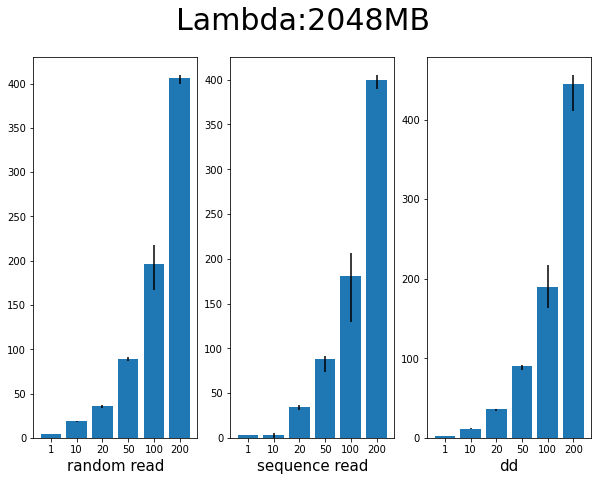

In [271]:
fig, axes = plt.subplots(1,3,figsize=(10,7))

axes[0] = plt.subplot(1,3,1)
axes[1] = plt.subplot(1,3,2)
axes[2] = plt.subplot(1,3,3)
axes[0].bar(concurrency_num,ran_bw)
axes[0].set_xlabel('random read',fontsize=15)
axes[1].bar(concurrency_num,seq_latency,yerr=error_seq.T)
axes[1].set_xlabel('sequence read',fontsize=15)
print(error_seq)
axes[2].bar(concurrency_num,dd_latency,yerr=error_dd.T)
axes[2].set_xlabel('dd',fontsize=15)
axes[0].set_ylabel('Latency',fontsize=30)
fig.suptitle('Lambda:2048MB',fontsize=30)

[[ 0.          2.03595959  2.14064681  4.44443378 23.78656668  7.74800163]
 [ 0.          1.35346021  1.11972058  2.52902213 23.00265341  4.25281901]]


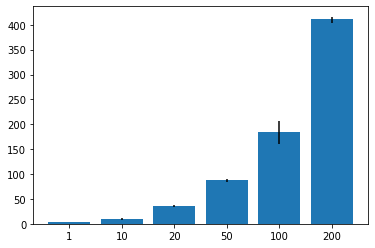

In [214]:
plt.bar(['1','10','20','50','100','200'],
       dd_latency
        ,yerr=error_dd.T)
print(error_dd.T)